In [38]:
import pandas as pd


In [39]:
df = pd.DataFrame({'a': [1, 4, 7, 2], 'b': [2, 0, 8, 7]})
df

,a,b
0,1,2
1,4,0
2,7,8
3,2,7


In [46]:
y = df.shape[0]
y


4

In [47]:
x = df.shape[1]
x

2

In [50]:
df_shape = 'df has {} rows and {} columns'
df_shape = df_shape.format(y, x)
df_shape

'df has 4 rows and 2 columns'

In [52]:
na_number = df.isna().sum()

In [53]:
na_number

a    0
b    0
dtype: int64

In [54]:
df_types = df.dtypes
df_types

a    int64
b    int64
dtype: object

In [55]:
df.age = df.age.astype('int64')

AttributeError: 'DataFrame' object has no attribute 'age'

In [56]:
df = df.drop(columns=['sex','age'])

KeyError: "['sex' 'age'] not found in axis"

In [ ]:
df = df.drop_duplicates(subset='client_id')

In [57]:
numbers = [1, -2, 3, 0, -3, 2]

In [58]:
positive_numbers = [i for i in numbers if i > 0]

In [59]:
positive_numbers

[1, 3, 2]

In [60]:
positive_numbers = []
for i in numbers:
    if i == 0:
        break
    elif i > 0:
        positive_numbers.append(i)
        
positive_numbers

[1, 3]

In [267]:
import pandas as pd

In [268]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/Lesson3/3_taxi_peru.csv'

In [269]:
taxi = pd.read_csv(path_to_file, sep=';')

In [270]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [271]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [272]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [229]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'], dayfirst=True)

In [230]:
taxi['end_at'] = pd.to_datetime(taxi['start_at'], dayfirst=True)

In [231]:
taxi['arrived_at'] = pd.to_datetime(taxi['start_at'], dayfirst=True)

In [168]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [232]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [273]:
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")


In [274]:
taxi.shape

(23091, 19)

In [275]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

In [276]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [207]:
driver_late = taxi.query("start_type == 'reserved' and wait_time > 0.0")
driver_late    

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
11,af7a0d5b65562d9e4f7749317efb1a3a,7abecd4f47c2c1d5390d86eb22181c90,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-28 03:15:00,"-12,10128779","-77,00463697",2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,Android,NaN,4.0,7.0
51,e1b5a14977e84b1900b5b69e040c3de1,1e44c0fd0a266c3719ff30410baa07cd,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,reserved,2010-10-12 19:45:00,"-12,11184692","-77,03222656",2010-10-12 20:49:00,"-12,02226257","-77,109375",drop off,"-12,02907305","-77,08317745",2010-10-12 19:56:00,iPhone,NaN,5.0,11.0
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,1.0
83,cd6a65a00f3ac91060d336a9f037f7f6,cb6ea169cefc7a0a5f1f8bd8ebbe3223,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-16 22:30:00,"-12,10181985","-76,97150599",2010-08-16 22:57:00,"-12,08880914","-76,99084405",drop off,"-12,06300311","-76,94575123",2010-08-16 22:33:00,Android,0.0,4.0,3.0
157,e1332f68e81526e498e4d845233a17ee,be2d7041cb5bae52cf3edaaf03798426,65b6f3b7075270499ddd0f1dc1130459,f78d50ea4f0c83a4a302d9fa82264b02,executive,reserved,2010-03-27 23:30:00,"-12,0966369","-77,0295319",2010-03-28 00:25:00,"-12,1249782","-77,0048048",drop off,"-12,08623295","-77,03547408",2010-03-27 23:31:00,web,NaN,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23044,883360491194dd3b866c897b2586a1d7,406921adcca37705ef527b4246c1370e,27c157e605c56c7df70c605963e1d386,27c157e605c56c7df70c605963e1c9b7,executive,reserved,2010-02-14 13:45:00,"-12,0918521","-77,0519091",2010-02-14 14:19:00,"-12,1593476","-77,0232917",drop off,"-12,0735807","-77,04195549",2010-02-14 13:49:00,web,NaN,NaN,4.0
23047,88a0d8a123b3c1b2f39bec89da7b30ae,406921adcca37705ef527b4246c12e83,406921adcca37705ef527b4246c19db3,406921adcca37705ef527b4246c1a5c6,executive,reserved,2010-05-07 13:20:00,"-12,0918423","-77,0421839",2010-05-07 14:13:00,"-12,0914361","-77,0857564",drop off,"-12,03970949","-77,05231815",2010-05-07 13:21:00,web,NaN,5.0,1.0
23053,8b9ae8141b48ed1643e02dbc76aa2290,0f0ffd9676b4aa664f8b88b76ca90cf4,406921adcca37705ef527b4246c19db3,406921adcca37705ef527b4246c1a5c6,executive,reserved,2010-05-09 01:30:00,"-12,0780836","-77,0906339",2010-05-09 02:50:00,"-12,019468","-77,107768",drop off,"-12,05495955","-77,05101171",2010-05-09 01:40:00,web,NaN,NaN,10.0
23063,4a645cbfd25b64d34f738808637353ca,4a645cbfd25b64d34f738808634b36bf,eeb07ac5409c082354b923689341b9ec,aba044a086704ad7e9dc66b8c926408d,executive,reserved,2010-04-16 15:15:00,"-12,0770342","-76,9885396",2010-04-16 15:40:00,"-12,1088702","-76,9886223",drop off,"-12,04602095","-77,02585903",2010-04-16 15:18:00,web,NaN,NaN,3.0


In [208]:
driver_late_most = driver_late \
        .groupby(['driver_id'], as_index=True) \
        .aggregate({'journey_id': 'count'}) \
        .sort_values(['journey_id'], ascending=False)
driver_late_most

,journey_id
driver_id,
406921adcca37705ef527b4246c0cfea,67
d665fb9f75ef5d9cd0fd89479380ba78,59
ec84a73745199ff840ecafcb924383ad,57
56f59b58bcbbd1cdabc3652e713134c2,51
c814db2127582cf95dea1f74f43127c2,45
...,...
d7bf644eb441cda6127f91addebb85c4,1
b68895736389f2949faa8c73555b81ac,1
8cb98e46b27af1e6fca8768a2a6329f3,1


In [119]:
orders_count = taxi \
        .groupby(['driver_id'], as_index=True) \
        .aggregate({'journey_id': 'count'}) \
        .sort_values(['journey_id'], ascending=False)
orders_count

,journey_id
driver_id,
c814db2127582cf95dea1f74f43127c2,1523
d665fb9f75ef5d9cd0fd89479380ba78,1225
ff5c924e0b630fd7c019a4234059fdf4,1111
406921adcca37705ef527b4246c0cfea,1075
ec84a73745199ff840ecafcb924383ad,974
...,...
b3ba9cda1b124b4fdc5d639f2416a9ca,1
af07f9929390d66edf63ab7ee480273c,1
ab90a1bf4289d96e78d4a47d7cc2cd22,1


In [279]:
import datetime

In [281]:
taxi['month'] = taxi.start_at.dt.month

In [282]:
import numpy as np

In [283]:
taxi['month'] = taxi['month'].fillna(0)


In [284]:
taxi.head(10)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,"-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,"-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9
5,2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-10 13:00:00,"-12,02241898","-77,10650635",2010-08-10 14:26:00,...,"-76,92608643",drop off,"-12,01706754","-77,05986526",2010-08-10 12:53:00,iPhone,NaN,4.0,-7.0,8
6,12432d83b49393bf25164673212b8295,56772d544fdfa589a020a1ff894a86f7,e1332f68e81526e498e4d845233a6d7d,e1332f68e81526e498e4d845235baf80,executive,reserved,2010-08-08 12:10:00,"-12,08995819","-76,9262085",2010-08-08 12:48:00,...,"-77,10623169",drop off,"-12,08509125","-76,96944424",2010-08-08 12:01:00,iPhone,5.0,5.0,-9.0,8
7,2e51db3a8a77aa594aa686ff19fe6036,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,2010-05-16 03:58:00,"-12,11347198","-77,04385376",2010-05-16 04:40:00,...,"-76,92266846",drop off,"-12,10828994","-77,03530221",2010-05-16 04:06:00,iPhone,5.0,5.0,8.0,5
8,0234eb5f7e99d581c72052f0a868289c,0234eb5f7e99d581c72052f0a869293a,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,asap,2010-07-09 05:56:00,"-12,11068311","-77,00212106",2010-07-09 06:37:00,...,"-77,09785346",drop off,"-12,12584246","-77,03298835",2010-07-09 06:13:00,Android,0.0,4.0,17.0,7
9,9448070ece760ea5386e5d4822121a6c,dd23cf0ef33ae44e0c0b4c756e1fe4e8,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,2010-11-22 23:42:00,"-12,08969627","-77,03574926",2010-11-23 00:53:00,...,"-77,03020982",drop off,"-12,0898203","-77,0358663",2010-11-23 00:05:00,Android,5.0,5.0,23.0,11


In [285]:
taxi['month'] = taxi['month'].apply(np.int64)

In [286]:
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,"-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,"-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,"-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5


In [287]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
dtype: object

In [288]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


In [289]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [290]:
taxi.month.value_counts()

12    3313
10    3240
11    3021
9     2598
8     2120
6     1936
5     1584
7     1512
4     1445
3      983
2      766
1      573
Name: month, dtype: int64

In [291]:
summer_orders = taxi.query("month == 8 or month == 7 or month == 6")
summer_orders

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
5,2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-10 13:00:00,"-12,02241898","-77,10650635",2010-08-10 14:26:00,...,drop off,"-12,01706754","-77,05986526",2010-08-10 12:53:00,iPhone,NaN,4.0,-7.0,8,Tuesday
6,12432d83b49393bf25164673212b8295,56772d544fdfa589a020a1ff894a86f7,e1332f68e81526e498e4d845233a6d7d,e1332f68e81526e498e4d845235baf80,executive,reserved,2010-08-08 12:10:00,"-12,08995819","-76,9262085",2010-08-08 12:48:00,...,drop off,"-12,08509125","-76,96944424",2010-08-08 12:01:00,iPhone,5.0,5.0,-9.0,8,Sunday
8,0234eb5f7e99d581c72052f0a868289c,0234eb5f7e99d581c72052f0a869293a,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,asap,2010-07-09 05:56:00,"-12,11068311","-77,00212106",2010-07-09 06:37:00,...,drop off,"-12,12584246","-77,03298835",2010-07-09 06:13:00,Android,0.0,4.0,17.0,7,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23097,16cbe35db7fff70fbc8251b4cdc966d6,a553c46e3a22fb9c326aeb3d72b3334e,ff5c924e0b630fd7c019a4234059fdf4,16cbe35db7fff70fbc8251b4cdaa06cb,executive,asap,2010-06-04 22:27:00,"-12,13883591","-76,99526978",2010-06-04 23:36:00,...,drop off,"-12,1271417","-77,02213456",2010-06-04 22:43:00,iPhone,NaN,5.0,16.0,6,Friday
23098,7d696ae0f1d27b6b752121cffb6ed157,a553c46e3a22fb9c326aeb3d72b3334e,ff5c924e0b630fd7c019a4234059fdf4,16cbe35db7fff70fbc8251b4cdaa06cb,executive,asap,2010-06-10 21:59:00,"-12,12014771","-76,98974609",2010-06-10 22:00:00,...,rider cancel,"-12,11959931","-76,9900784",NaT,iPhone,NaN,NaN,NaN,6,Thursday
23099,7d696ae0f1d27b6b752121cffb6f8ad5,a553c46e3a22fb9c326aeb3d72b3334e,ff5c924e0b630fd7c019a4234059fdf4,16cbe35db7fff70fbc8251b4cdaa06cb,executive,asap,2010-06-10 21:22:00,"-12,13884735","-76,99530029",2010-06-10 21:58:00,...,drop off,"-12,10981926","-76,97739412",2010-06-10 21:37:00,iPhone,NaN,5.0,15.0,6,Thursday
23103,2ca7077f2fa5233904198635ad62955a,78851a91f305d3ed7bb3cc0111e073aa,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-06-26 21:30:00,"-12,0933609","-77,02246094",2010-06-26 21:24:00,...,drop off,"-12,099756","-77,01222897",2010-06-26 21:16:00,iPhone,5.0,5.0,-14.0,6,Saturday


In [294]:
orders_count_summer = summer_orders \
        .groupby(['month'], as_index=True) \
        .aggregate({'journey_id': 'count'}) \
        .sort_values(['journey_id'], ascending=False)
orders_count_summer

,journey_id
month,
8,2120
6,1936
7,1512


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


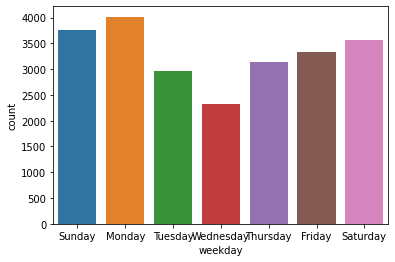

In [296]:
sns.countplot(taxi['weekday'], order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [298]:
orders_count_week = taxi \
        .groupby(['weekday'], as_index=True) \
        .aggregate({'journey_id': 'count'}) \
        .sort_values(['journey_id'], ascending=False)
orders_count_week

,journey_id
weekday,
Monday,4018
Sunday,3752
Saturday,3569
Friday,3332
Thursday,3133
Tuesday,2965
Wednesday,2322


In [306]:
orders_by_month = taxi \
        .groupby(['month'], as_index=False) \
        .aggregate({'user_id': pd.Series.nunique}) \
  

In [307]:
orders_by_month

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


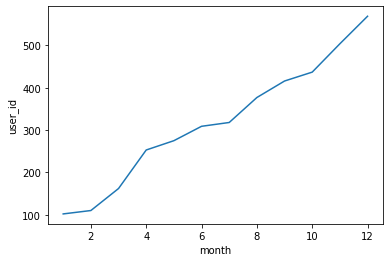

In [308]:
sns.lineplot(orders_by_month.month, orders_by_month.user_id)